# Unit 1: Probability

The goals of this assignment are to help you (1) calculate probabilities, (2) simulate probabilistic processes, and (3) estimate probabilities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly.

## Problem 1

**1.(a) Construct a vector/array that represents a coin. The vector, called `coin`, should have two entries, one for heads (H) and ones for tails (T).**

In [1]:
#YOUR CODE HERE
coin = c(0,1)

**1.(b) Simulate flipping the coin 500 times (try ?sample)**

In [2]:
#YOUR CODE HERE
set.seed(010111); 
n = 500; 
s = sample(coin, size = n, prob = c(0.5,0.5), replace = TRUE); 

**1.(c) Plot the proportion of times the "coin" landed on heads on the $i^{th}$ flip, for $i = 1,...,500$. The x-axis should represent the number of flips, starting at $1$ and going to $500$, and the y-axis should represent the cumulative proportion of heads at flip $i$. Why does this number fluctuate more when the number of flips is smaller?**

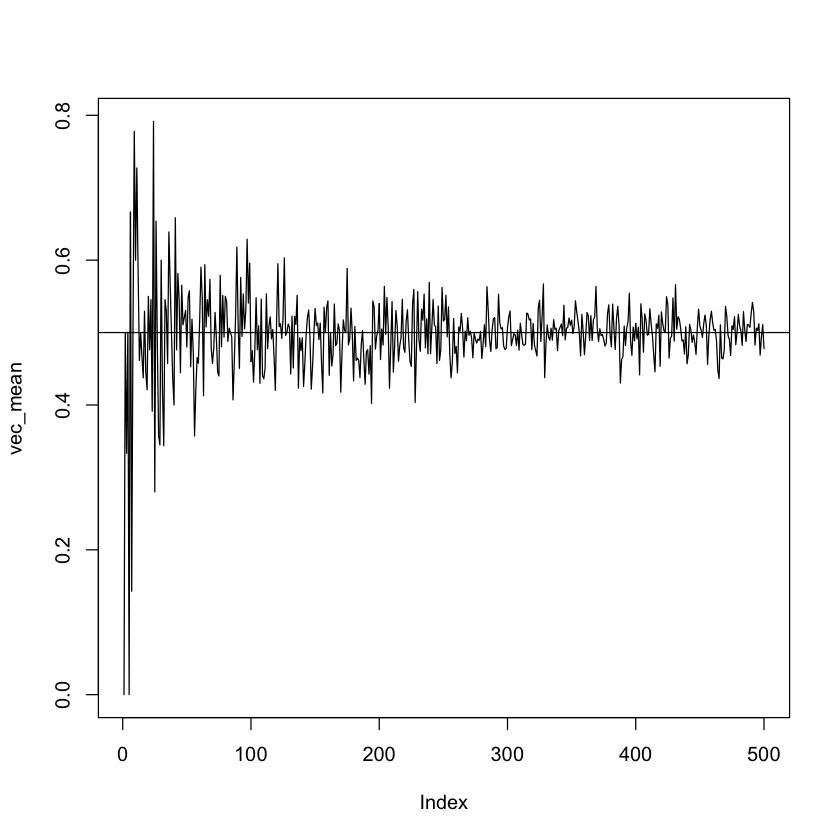

In [4]:
#YOUR CODE HERE
set.seed(001); 
vec_mean = matrix(NA, ncol = 1, nrow = n); 

for(i in 1:n){
    vec_mean[i] = mean(sample(coin, i, replace = TRUE))
}
plot(vec_mean, type = "l"); 
abline(0.5,0); 

The function fluctuates more when the number of flips is smaller because less flips means less outcomes to calculate for the mean. For examples, if the first two flips are heads than the mean would lean towards heads. However, as more flips are made more possible outcomes are flipped. As you increase the number of flips, it will converge to $\frac{1}{2}$.

#### (d) Repeat this process for a biased coin, where the probability of heads is 0.75.

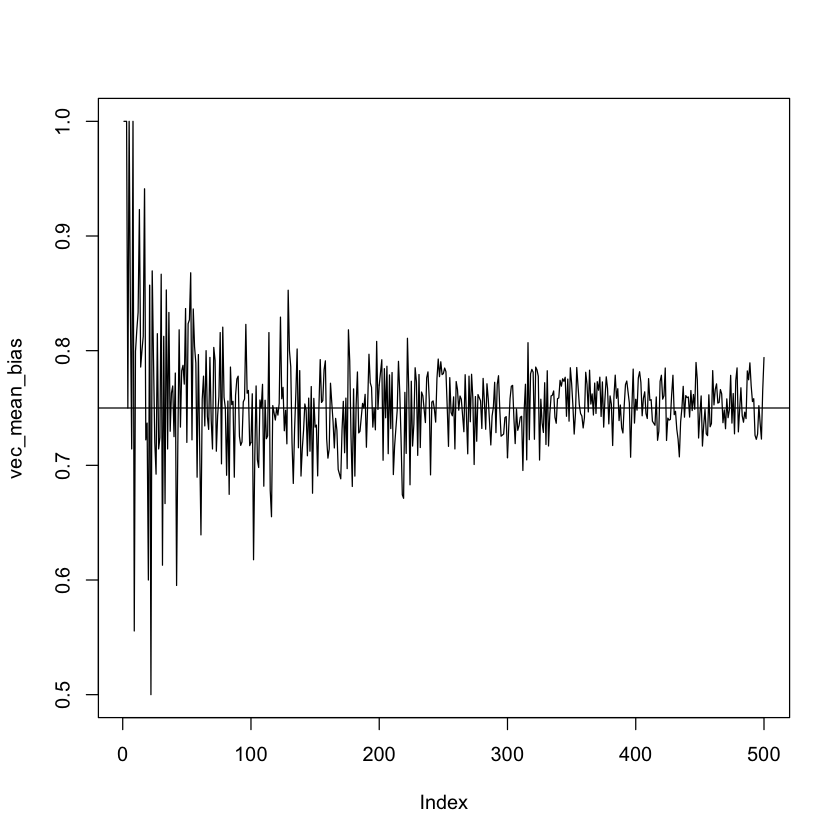

In [7]:
#YOUR CODE HERE
vec_mean_bias = matrix(NA, ncol = 1, nrow = n); 
for(i in 1:n){
    vec_mean_bias[i] = mean(sample(coin, i, prob = c(0.25,0.75), replace = TRUE))
}
plot(vec_mean_bias, type = "l");
abline(0.75,0); 

## Problem 2

Recall the following problem from our notes:

Suppose that your music app contains 100 songs, 10 of which are by the Beatles. Using the shuffle feature, what is the probability that the first Beatles song heard is the fifth song played?

We solved this "by hand" in lecture; that is, up to rounding, we calculated the true probability. Now let's run a simulation to estimate the probability.

1. Create a variable to represent the $100$ songs in your library, where $10$ are Beatles songs (denoted with a `1`) and $90$ are non-Beatles songs (denoted with a `0`). The result should be a vector named `songs` of length $100$, with $10$ `0`s and $90$ `1`s. Using `rep()` will make life easier!

2. Randomly draw five songs, *without replacement*, from `songs` with the `sample()` function. What does the result look like?

3. Write code to test whether the five song draw from step 2 meets the description "the first Beatles song heard is the fifth song played". 

4. Repeat step 2 `m = 10,000` times.

5. Repeat step 3 for each of the `m` five song draws created in step 4.

6. Estimate the probability that "the first Beatles song heard is the fifth song played", and compare your answer to the one computed in our notes. What could make your answer more accurate? Less accurate?


In [8]:
#YOUR CODE HERE
songs <- c(rep(1,10), rep(0,90)); 

In [10]:
#YOUR CODE HERE
s = sample(songs, size = 5, replace = FALSE); 

In [11]:
#YOUR CODE HERE
ifelse(s[1] ==0 & s[2] == 0 & s[3] == 0 & s[4] == 0 & s[5] == 1, 1, 0); 

[1] 0

In [12]:
#YOUR CODE HERE
m = 1000; 
shuffle_no_replace = t(replicate(m, sample(songs, size = 5, replace = FALSE))); 

In [13]:
#YOUR CODE HERE
x = 0; 
for (i in 1:m){
    x = x + ifelse(shuffle_no_replace[i,1] == 0 &
                   shuffle_no_replace[i,2] == 0 &
                   shuffle_no_replace[i,3] == 0 &
                   shuffle_no_replace[i,4] == 0 &
                   shuffle_no_replace[i,5] == 1, 1,0); 
}
x/m

[1] 0.074

Our answer in our notes was, 0.068. Compared to what we obtain that is pretty close. What can make our answer more accurate is increasing the number of attempts to draw a beatle song on the 5th draw. Therefore, increasing $m$. To decrease the accuracy just decrease $m$. 

# Problem 3

Imagine two unmarked bags filled with poker chips. Each bag contains both red poker chips and white poker chips. In bag one, there are 75% red and 25% white; in bag two, there are 75% white and 25% red. Imagine that you pick one bag at random, and, without looking inside, begin to pull chips out, one at a time. 

**3.(a) Before you start picking out chips, what is the probability that you choose bag one?**

$0.5$

**3.(b) What is the probability that you chose bag one given that you draw a red chip?**

$P(1|R) = \frac{P(R|1)P(1)}{P(R|1)P(1) + P(R|2)P(2)}$

In [1]:
(0.75*0.5)/(0.75*0.5 + 0.25*0.5)

[1] 0.75

**3.(c) What is the probability that you have bag one given that your first two draws are red chips? What about three? Is there a pattern?**

Sequential Update: Assume the update given in (b). That is, we've chosen one chip, it was red, and we updated our belief about which bag we have. After this update, $P(1) = 0.75$ and $P(2) = 0.25$. Bayes theorem says: 

\begin{equation} 
P(1|R_2) = \frac{P(R_2|1)P(1)}{P(R_2|1)P(1) + P(R_2|2)P(2)} = \frac{0.75^2}{0.75^2 + 0.25^2} = 0.9
\end{equation}

In [7]:
coin = c(0,1); 
n=2
sample(coin, size = n, prob = c(0.5,0.5), replace = FALSE); 

[1] 0 1